In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from Utils import plotMetricsGraphComparison 

In [2]:
# Read columns used to build models
columns = pd.read_csv('Data/basic_model_columns.csv')['Columns'].to_list()

In [3]:
X_train = pd.read_csv('Data/X_train_undersampled_data.csv')[columns]
X_test = pd.read_csv('Data/X_test.csv')[columns]
Y_train = pd.read_csv('Data/y_train_undersampled_data.csv')
Y_test = pd.read_csv('Data/y_test.csv')

test_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

### Decision Tree Classification Model (Without Bagging)

In [4]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(random_state=47)
decisionTreeModel.fit(X_train, Y_train)

# Predict the output based on our training and testing dataset
Y_train_pred = decisionTreeModel.predict(X_train)
Y_test_pred = decisionTreeModel.predict(X_test)

In [5]:
test_metric = {
    "Classification Model": "Decision Tree",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993


### Applying Adaboost to Improve Classification Performance

Previously, we utilized a decision tree as one of our classification techniques. A potential enhancement is to apply AdaBoost, which is an ensemble boosting technique. Boosting helps improve the accuracy of decision trees by focusing on instances that the previous models misclassified. This method not only increases accuracy but also aims to reduce bias rather than variance.

To enhance the decision tree model via boosting, we will employ the AdaBoost model, which uses a series of weak learners and focuses on correcting the mistakes of the previous models in the sequence, thus adapting to the more challenging aspects of the classification problem.

# Applying AdaBoost
Implementation of AdaBoost with a decision tree as the base learner. We train the AdaBoost model and then evaluate its performance, comparing it to the initial decision tree model to observe any improvements.


In [6]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the base classifier
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=47)

# AdaBoost Classifier Model
adaBoostModel = AdaBoostClassifier(estimator=base_estimator,
                                   n_estimators=50, # Default value, but you can modify the number of estimators
                                   random_state=47)
adaBoostModel.fit(X_train, Y_train.values.ravel())


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [7]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train)
Y_test_pred = adaBoostModel.predict(X_test)

Train and Test Data Confusion Matrix:


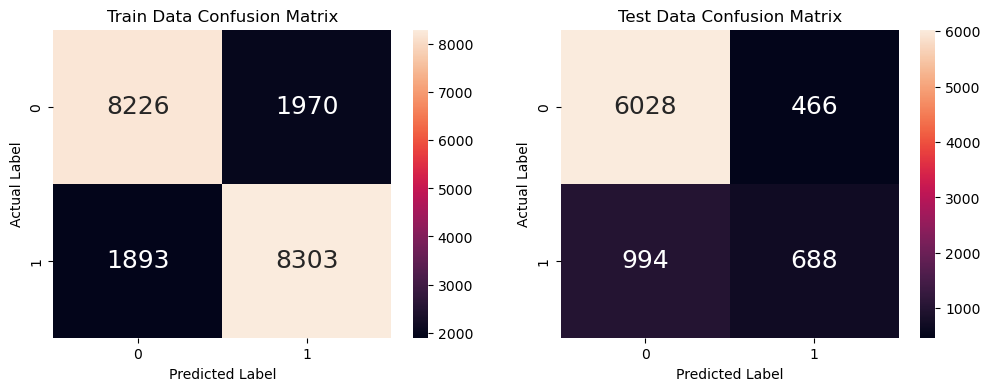

In [8]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [9]:
test_metric = {
    "Classification Model": "Adaboost",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

In [10]:
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
1,Adaboost,0.821429,0.596187,0.409037,0.485190


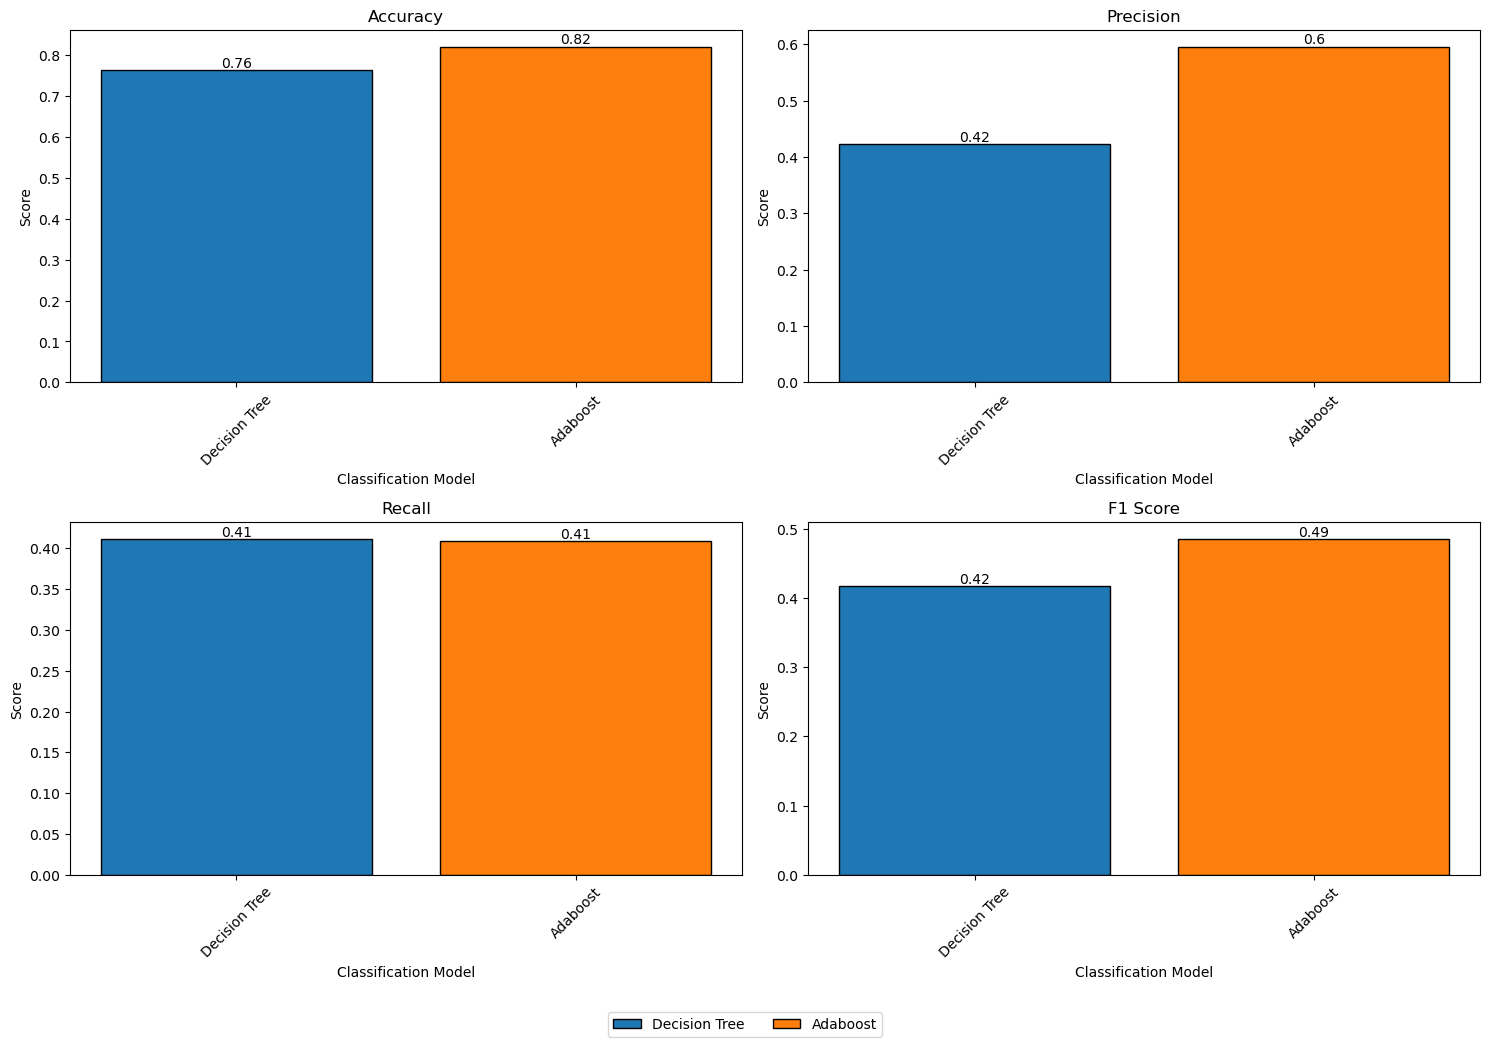

In [11]:
plotMetricsGraphComparison(test_metrics)


After applying boosting to enhance the Decision Tree, we can observe that AdaBoost exhibits higher accuracy and precision than the initial decision tree model, demonstrating a significant improvement in overall model performance.

However, similar to the decision tree model, the recall score remains low with AdaBoost. This indicates that despite the improved accuracy and precision, both models still only correctly identify a low percentage of the actual positive labels. Such low recall scores could stem from factors like data imbalances or the characteristics of the data features used in training. To address these issues and potentially improve the model's ability to recognize positive cases, we will explore feature engineering to develop new attributes that might better capture the nuances in the data.

Feature engineering notebook can be found at: [Feature Engineering Notebook](./Feature%20Engineering.ipynb).


### Load Data After Feature Engineering

In [12]:
X_train = pd.read_csv('Data/X_train_engineered.csv')
X_test = pd.read_csv('Data/X_test_engineered.csv')
Y_train = pd.read_csv('Data/y_train_undersampled_data.csv')
Y_test = pd.read_csv('Data/y_test.csv')

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (20392, 1) (20392, 75)
Test Set  : (8176, 1) (8176, 75)


# Feature Selection Techniques
Detail the various feature selection methods used (RFE, forward selection, backward elimination, and Select K Best) and their purpose in refining the model by removing irrelevant or less important features.


In [13]:
from FeatureSelectionUtils import feature_selection_using_rfecv_on_f1score, forward_selection_with_metrics, backward_elimination_with_metrics, select_k_best_with_mutual_info, save_feature_data_to_csv, get_selected_features_as_list, feature_selection_using_rfecv_on_accuracyscore

#### RFE Using F1 Score 

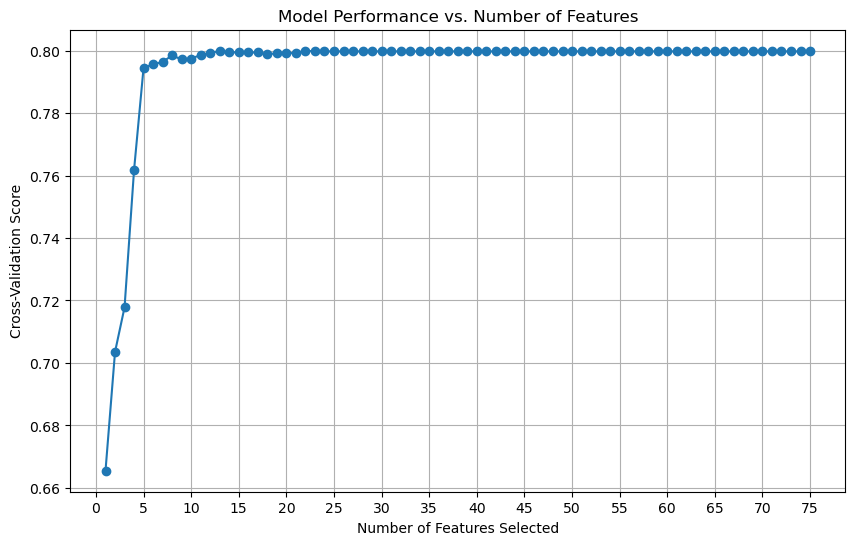

Optimal number of features based on F1 Score: 13


In [14]:
featuresForBestRunUsingF1Score = feature_selection_using_rfecv_on_f1score(adaBoostModel, X_train, Y_train)

##### Getting selected features as Array

In [15]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingF1Score)
print(selected_features)

['have_special_requests', 'perc_weekday_nights_scaled', 'room_type_reserved_room_type 1', 'market_segment_type_aviation', 'market_segment_type_corporate', 'market_segment_type_offline', 'market_segment_type_online', 'required_car_parking_space', 'no_of_adults_scaled', 'no_of_week_nights_scaled', 'no_of_special_requests_scaled', 'lead_time_scaled', 'avg_price_per_room_scaled']


##### Creating training and test data using only selected features

In [16]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [17]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [18]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


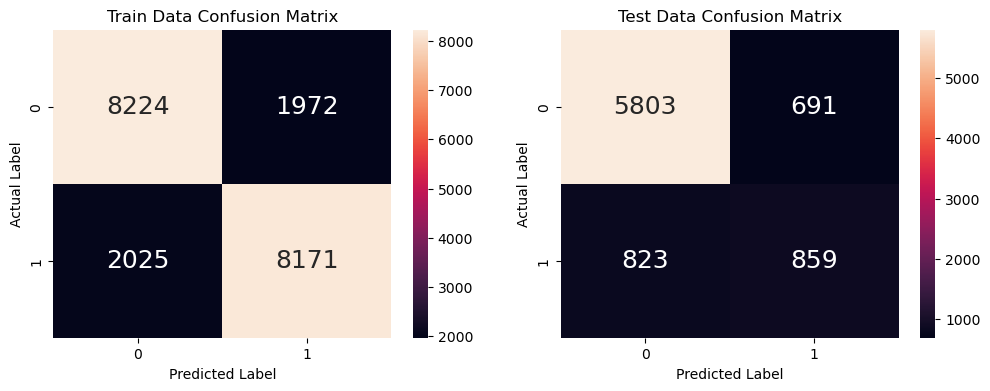

In [19]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [20]:
test_metric = {
    "Classification Model": "Adaboost + RFE (F1) Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
2,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
1,Adaboost,0.821429,0.596187,0.409037,0.485190


#### RFE Using Accuracy Score 

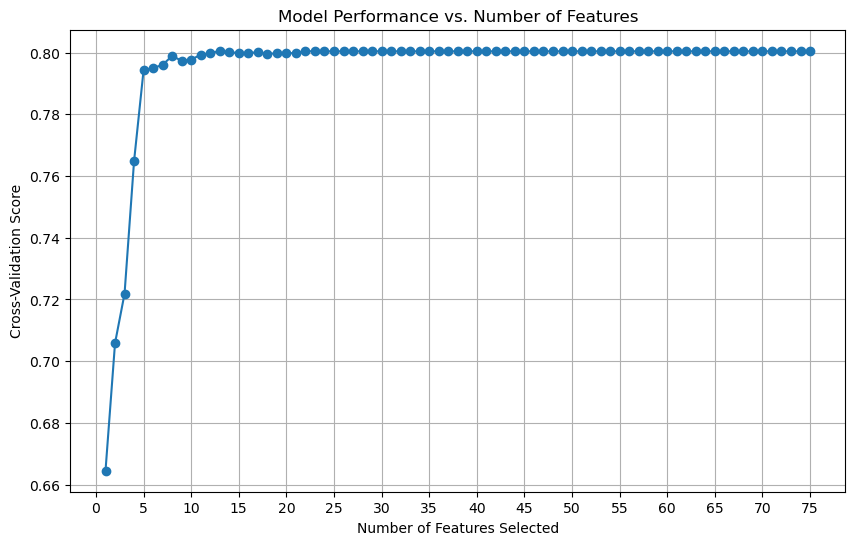

Optimal number of features based on Accuracy Score: 13


In [21]:
featuresForBestRunUsingAccuracyScore = feature_selection_using_rfecv_on_accuracyscore(adaBoostModel, X_train, Y_train)

##### Getting selected features as Array

In [22]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingAccuracyScore)
print(selected_features)

['have_special_requests', 'perc_weekday_nights_scaled', 'room_type_reserved_room_type 1', 'market_segment_type_aviation', 'market_segment_type_corporate', 'market_segment_type_offline', 'market_segment_type_online', 'required_car_parking_space', 'no_of_adults_scaled', 'no_of_week_nights_scaled', 'no_of_special_requests_scaled', 'lead_time_scaled', 'avg_price_per_room_scaled']


##### Creating training and test data using only selected features

In [23]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [24]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [25]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


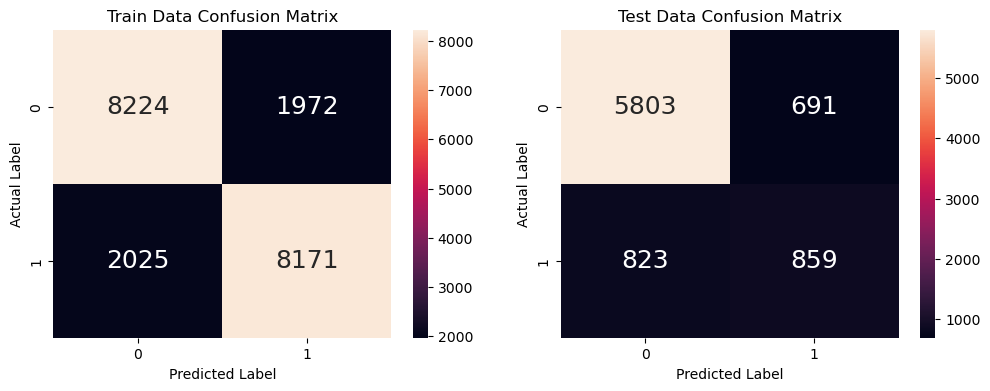

In [26]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [27]:
test_metric = {
    "Classification Model": "Adaboost + RFE (Accuracy) Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}
# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
1,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
3,Adaboost + RFE (Accuracy) Selection,0.814824,0.554194,0.510702,0.531559
2,Adaboost,0.821429,0.596187,0.409037,0.485190


#### Forward Selection

In [28]:
featuresForBestRunUsingForwardSelection = forward_selection_with_metrics(X_train, Y_train, X_test, Y_test, adaBoostModel)

Selected features: ['lead_time_cat_200 to 300', 'no_of_weekend_nights_scaled', 'booking_dayofweek_3', 'cancellation_type_no_booking', 'market_segment_type_complementary']
Best accuracy: 0.7965998043052838


##### Getting selected features as Array

In [29]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingForwardSelection)
print(selected_features)

['cancellation_type_no_booking', 'lead_time_cat_200 to 300', 'booking_dayofweek_3', 'market_segment_type_complementary', 'no_of_weekend_nights_scaled']


##### Creating training and test data using only selected features

In [30]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [31]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [32]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


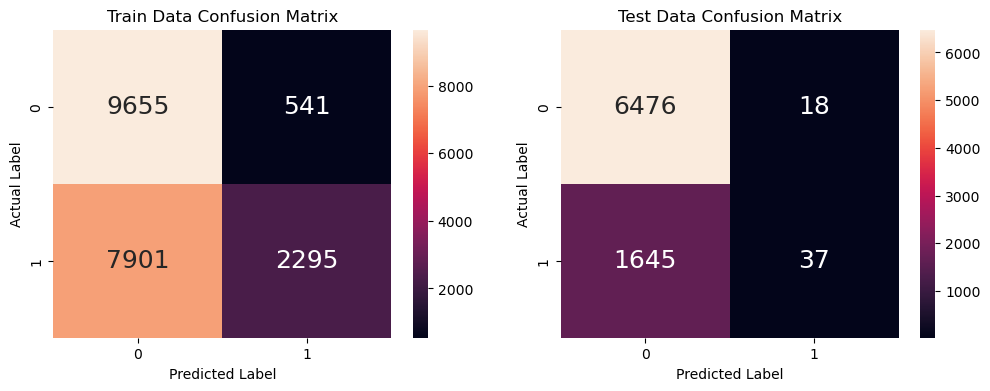

In [33]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [34]:
test_metric = {
    "Classification Model": "Adaboost + Forward Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
4,Adaboost + Forward Selection,0.796600,0.672727,0.021998,0.042602
1,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
2,Adaboost + RFE (Accuracy) Selection,0.814824,0.554194,0.510702,0.531559
3,Adaboost,0.821429,0.596187,0.409037,0.485190


#### Backward Selection

In [35]:
featuresForBestRunUsingBackwardSelection = backward_elimination_with_metrics(X_train, Y_train, X_test, Y_test, adaBoostModel)

Initial score:  0.8123776908023483
Selected features: ['traveller_type_adults_only', 'traveller_type_children_only', 'traveller_type_mixed', 'stay_type_hour_room', 'stay_type_mixed', 'stay_type_weekday_only', 'stay_type_weekend_only', 'cancellation_type_all_cancelled', 'cancellation_type_all_successful', 'cancellation_type_mixed', 'cancellation_type_no_booking', 'lead_time_cat_0 to 50', 'lead_time_cat_100 to 150', 'lead_time_cat_150 to 200', 'lead_time_cat_200 to 300', 'lead_time_cat_50 to 100', 'lead_time_cat_greater than 300', 'avg_price_per_room_cat_0 to 50', 'avg_price_per_room_cat_100 to 150', 'avg_price_per_room_cat_150 to 200', 'avg_price_per_room_cat_200 to 300', 'avg_price_per_room_cat_50 to 100', 'avg_price_per_room_cat_greater than 300', 'arrival_dayofweek_1', 'arrival_dayofweek_2', 'arrival_dayofweek_3', 'arrival_dayofweek_4', 'arrival_dayofweek_5', 'arrival_dayofweek_6', 'booking_dayofweek_0', 'booking_dayofweek_1', 'booking_dayofweek_4', 'booking_dayofweek_5', 'booking_da

##### Getting selected features as Array

In [36]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingBackwardSelection)
print(selected_features)

['traveller_type_adults_only', 'traveller_type_children_only', 'traveller_type_mixed', 'stay_type_hour_room', 'stay_type_mixed', 'stay_type_weekday_only', 'stay_type_weekend_only', 'cancellation_type_all_cancelled', 'cancellation_type_all_successful', 'cancellation_type_mixed', 'cancellation_type_no_booking', 'lead_time_cat_0 to 50', 'lead_time_cat_100 to 150', 'lead_time_cat_150 to 200', 'lead_time_cat_200 to 300', 'lead_time_cat_50 to 100', 'lead_time_cat_greater than 300', 'avg_price_per_room_cat_0 to 50', 'avg_price_per_room_cat_100 to 150', 'avg_price_per_room_cat_150 to 200', 'avg_price_per_room_cat_200 to 300', 'avg_price_per_room_cat_50 to 100', 'avg_price_per_room_cat_greater than 300', 'arrival_dayofweek_1', 'arrival_dayofweek_2', 'arrival_dayofweek_3', 'arrival_dayofweek_4', 'arrival_dayofweek_5', 'arrival_dayofweek_6', 'booking_dayofweek_0', 'booking_dayofweek_1', 'booking_dayofweek_4', 'booking_dayofweek_5', 'booking_dayofweek_6', 'solo_traveller', 'have_special_requests',

##### Creating training and test data using only selected features

In [37]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [38]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [39]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


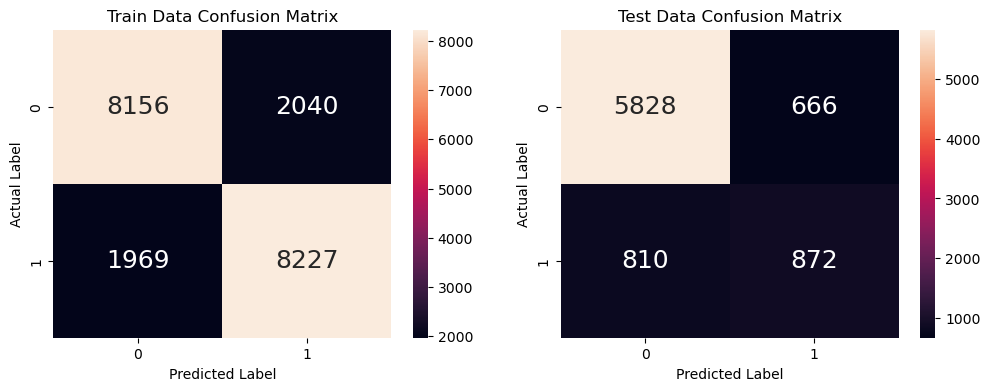

In [40]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [41]:
test_metric = {
    "Classification Model": "Adaboost + Backward Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
1,Adaboost + Forward Selection,0.796600,0.672727,0.021998,0.042602
2,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
3,Adaboost + RFE (Accuracy) Selection,0.814824,0.554194,0.510702,0.531559
5,Adaboost + Backward Selection,0.819472,0.566970,0.518430,0.541615
4,Adaboost,0.821429,0.596187,0.409037,0.485190


#### Select K Best

In [42]:
featuresForBestRunUsingSelectKBest = select_k_best_with_mutual_info(X_train, Y_train,10)

/Users/dylansiew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Getting selected features as Array

In [43]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingSelectKBest)
print(selected_features)

['lead_time_cat_0 to 50', 'lead_time_cat_150 to 200', 'lead_time_cat_200 to 300', 'lead_time_cat_greater than 300', 'avg_price_per_room_cat_100 to 150', 'have_special_requests', 'no_of_previous_bookings_not_canceled_scaled', 'no_of_special_requests_scaled', 'lead_time_scaled', 'avg_price_per_room_scaled']


##### Creating training and test data using only selected features

In [44]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [45]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [46]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


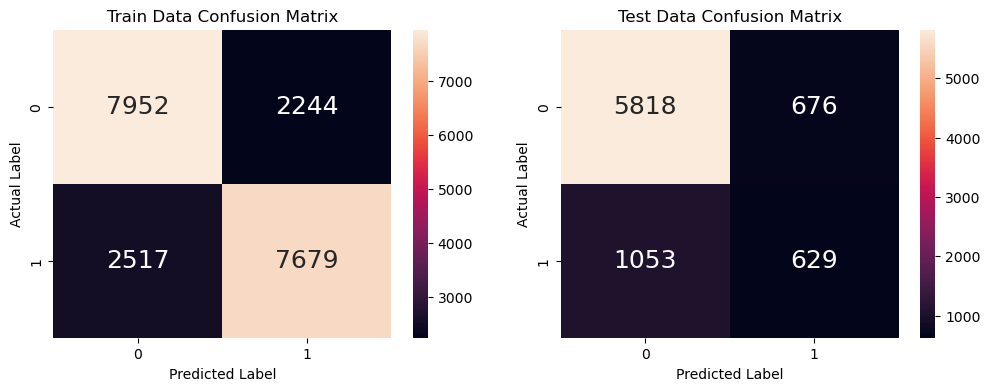

In [47]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [48]:
test_metric = {
    "Classification Model": "Adaboost + Select K Best Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
6,Adaboost + Select K Best Selection,0.788527,0.481992,0.373960,0.421158
1,Adaboost + Forward Selection,0.796600,0.672727,0.021998,0.042602
2,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
3,Adaboost + RFE (Accuracy) Selection,0.814824,0.554194,0.510702,0.531559
4,Adaboost + Backward Selection,0.819472,0.566970,0.518430,0.541615
5,Adaboost,0.821429,0.596187,0.409037,0.485190


In [49]:
models_feature_data = [
    ("RFE F1 Score", featuresForBestRunUsingF1Score),
    ("Forward Selection", featuresForBestRunUsingForwardSelection),
    ("Backward Selection", featuresForBestRunUsingBackwardSelection),
    ("Select K Best", featuresForBestRunUsingSelectKBest)
]

final_df = save_feature_data_to_csv(models_feature_data, "Adaboost")

### Key Insights:

1. **Overall Performance**: AdaBoost models generally outperform the Decision Tree model across all metrics, indicating the strength of the AdaBoost algorithm in handling complex datasets.

2. **Best Model**: The AdaBoost with Backward Selection method shows the highest F1 Score (0.541615), which is a balanced metric considering both Precision and Recall. This model also has a high Accuracy of 0.819472, making it the best overall model among those tested.

3. **Concerns with Forward Selection**: Despite AdaBoost with Forward Selection achieving the highest Precision (0.672727), its extremely low Recall (0.021998) and consequently low F1 Score (0.042602) indicate that it is too conservative, possibly only predicting positive cases when it is highly certain, leading to many missed positive predictions.

4. **Consistency in RFE Models**: Both RFE models (based on F1 and Accuracy) show identical scores across all metrics, suggesting that the feature selection is robust in maintaining performance regardless of the selection criterion.

5. **Impact of Feature Selection**: Models utilizing feature selection techniques generally show improved performance over the basic AdaBoost model, with the exception of Forward Selection. This highlights the importance of appropriate feature selection in model efficacy.